# <span style="color:teal">**Exploratory Analysis of U.S. Renewable Energy Consumption**</span>

### **Author:** Kami Denny
### **Purpose:** Perform exploratory data analysis (EDA) to uncover patterns and insights on U.S. Renewable Energy Consumption
### **Date:** February 18th, 2025

<hr style="border: 1px solid teal;">

###  <span style="color:teal">**Introduction:**</span>

#### In this Jupyter notebook, I plan to investigate the impact of sector-specific renewable energy consumption on overall energy trends in the United States. The sectors under consideration are Commercial, Electric Power, Industrial, Residential, and Transportation. Specifically, I will focus on the most impactful energy sources for each sector over time. By analyzing the consumption patterns of the top three energy sources in each sector, I aim to gain a comprehensive understanding of the contributions of different sectors to the overall renewable energy landscape.

<hr style="border: 1px solid teal;">

#### 1. Imports

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Axes object (basic plot type returned by Seaborn)
from matplotlib.axes import Axes

<hr style="border: 1px solid teal;">

#### 2. Load Data

In [102]:
# Load the US_Renewable_Energy_Consumption.csv into pandas DataFrame
# We will use this data to analyze Sectors and their consumption of renewable energy
US_Renewable_df: pd.DataFrame = pd.read_csv('US_Renewable_Energy_Consumption.csv')

# List column names
US_Renewable_df.columns

# Inspect first few rows of the DataFrame
US_Renewable_df.head(10)

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
0,1973,1,Commerical,0.000,0.000,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.570,0.0,0.0,0.000,0.0
1,1973,1,Electric Power,0.000,0.490,0.0,0.0,0.054,0.157,0.0,0.0,0.211,89.223,0.0,0.0,88.522,0.0
2,1973,1,Industrial,1.040,0.000,0.0,0.0,98.933,0.000,0.0,0.0,98.933,99.973,0.0,0.0,0.000,0.0
3,1973,1,Residential,0.000,0.000,0.0,0.0,30.074,0.000,0.0,0.0,0.000,30.074,0.0,0.0,0.000,0.0
4,1973,1,Transportation,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0
5,1973,2,Commerical,0.000,0.000,0.0,0.0,0.515,0.000,0.0,0.0,0.515,0.515,0.0,0.0,0.000,0.0
6,1973,2,Electric Power,0.000,0.448,0.0,0.0,0.157,0.144,0.0,0.0,0.301,79.331,0.0,0.0,78.582,0.0
7,1973,2,Industrial,0.962,0.000,0.0,0.0,89.359,0.000,0.0,0.0,89.359,90.320,0.0,0.0,0.000,0.0
8,1973,2,Residential,0.000,0.000,0.0,0.0,27.164,0.000,0.0,0.0,0.000,27.164,0.0,0.0,0.000,0.0
9,1973,2,Transportation,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0


<hr style="border: 1px solid teal;">

#### 3. Initial Data Inspection

In [103]:
# Inspect the shape of the DataFrame with shape attribute
US_Renewable_df.shape

# Inspect the data types of the columns with dtypes attribute
US_Renewable_df.dtypes

# Inspect the data types of the columns with info() method
US_Renewable_df.info()

# Get the unique values in a specific column
unique_sector = US_Renewable_df['Sector'].unique()
print(f"Unique values in the 'Sector' column: {unique_sector}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                3065 non-null   int64  
 1   Month                               3065 non-null   int64  
 2   Sector                              3065 non-null   object 
 3   Hydroelectric Power                 3065 non-null   float64
 4   Geothermal Energy                   3065 non-null   float64
 5   Solar Energy                        3065 non-null   float64
 6   Wind Energy                         3065 non-null   float64
 7   Wood Energy                         3065 non-null   float64
 8   Waste Energy                        3065 non-null   float64
 9   Fuel Ethanol, Excluding Denaturant  3065 non-null   float64
 10  Biomass Losses and Co-products      3065 non-null   float64
 11  Biomass Energy                      3065 no

#### <span style="color:teal">**Summary of Initial Inspection**</span>
##### - The data doesn't have any null values in the 3,065 total attributes.
##### - The DataFrame contains 17 columns
##### - `Sector` column is categorical. There are two numeric integer fields, and 14 numeric float fields.
##### - The unique values in the `Sector` column are: `Commercial`, `Electric Power`, `Industrial`, `Residential`, and `Transportation`.

<hr style="border: 1px solid teal;">

#### 4. Initial Descriptive Statistics

In [104]:
# Inspect summary statistics for numerical columns:
US_Renewable_df.describe()

,Year,Month,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
count,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000
mean,1998.042414,6.491028,0.169759,1.146369,2.015008,4.282404,36.644408,5.820124,6.976648,4.834706,46.285969,70.872209,0.428949,0.031752,15.757374,0.953720
std,14.747378,3.456934,0.373819,1.550857,5.774511,18.124793,46.900639,8.247359,21.911920,15.601717,64.241520,71.197761,2.687850,0.258149,32.134059,3.985003
min,1973.000000,1.000000,-0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1985.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.483000,0.000000,0.000000,0.000000,0.258000,2.070000,0.000000,0.000000,0.000000,0.000000
50%,1998.000000,6.000000,0.000000,0.357000,0.004000,0.000000,12.062000,0.108000,0.007000,0.000000,9.716000,50.984000,0.000000,0.000000,0.000000,0.000000
75%,2011.000000,9.000000,0.036000,1.673000,0.774000,0.001000,51.808000,12.764000,1.283000,0.000000,89.359000,126.982000,0.000000,0.000000,0.000000,0.000000
max,2024.000000,12.000000,2.047000,5.951000,64.040000,157.409000,183.628000,32.875000,104.420000,75.373000,233.200000,308.175000,38.344000,4.101000,117.453000,27.871000


In [105]:
# Drop the 'Year' and 'Month' columns
df_filtered = US_Renewable_df.drop(columns=['Year', 'Month'])

# Create a table with averages grouped by sector
sector_averages = df_filtered.groupby('Sector').mean()

# Display the table
sector_averages

,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
Sector,,,,,,,,,,,,,,
Commerical,0.021874,0.735148,0.728088,0.009465,4.679581,2.356390,0.456132,0.000000,7.492103,8.987750,0.000000,0.000000,0.000000,0.0000
Electric Power,0.000000,3.478055,4.510842,21.394140,9.924644,14.474961,0.000000,0.000000,24.399595,132.569471,0.000000,0.000000,78.786869,0.0000
Industrial,0.826920,0.215688,0.182325,0.008416,121.596129,12.269269,0.553075,24.173532,158.592010,159.825390,0.000000,0.000000,0.000000,0.0000
Residential,0.000000,1.302954,4.653786,0.000000,47.021688,0.000000,0.000000,0.000000,0.000000,52.978434,0.000000,0.000000,0.000000,0.0000
Transportation,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.874033,0.000000,40.946139,0.000000,2.144744,0.158762,0.000000,4.7686


In [106]:
import pandas as pd

# List of energy source columns to consider (excluding the total consumption field)
energy_sources = [
    'Hydroelectric Power', 'Geothermal Energy', 'Solar Energy', 'Wind Energy', 'Wood Energy',
    'Waste Energy', 'Fuel Ethanol, Excluding Denaturant', 'Biomass Losses and Co-products',
    'Biomass Energy', 'Renewable Diesel Fuel', 'Other Biofuels', 'Conventional Hydroelectric Power', 'Biodiesel'
]

# Calculate the average consumption of renewable energy sources by sector
sector_averages = US_Renewable_df.groupby('Sector')[energy_sources].mean()

# Find the top three energy sources for each sector
top_three_energy_sources = sector_averages.apply(lambda x: x.nlargest(3).index.tolist(), axis=1)

# Convert the result to a DataFrame for better visualization
top_three_energy_sources_df = top_three_energy_sources.apply(pd.Series)
top_three_energy_sources_df.columns = ['Top 1', 'Top 2', 'Top 3']

# Display the table
print("Top Energy Source by Sector")
print(top_three_energy_sources_df)

Top Energy Source by Sector
                                           Top 1  \
Sector                                             
Commerical                        Biomass Energy   
Electric Power  Conventional Hydroelectric Power   
Industrial                        Biomass Energy   
Residential                          Wood Energy   
Transportation                    Biomass Energy   

                                             Top 2  \
Sector                                               
Commerical                             Wood Energy   
Electric Power                      Biomass Energy   
Industrial                             Wood Energy   
Residential                           Solar Energy   
Transportation  Fuel Ethanol, Excluding Denaturant   

                                         Top 3  
Sector                                          
Commerical                        Waste Energy  
Electric Power                     Wind Energy  
Industrial      Biomass Losses a

#### <span style="color:teal">**Summary of Averages by Sector**</span>
- The Electric Power sector is the largest consumer of renewable energy, with significant contributions from Wind Energy and Conventional Hydroelectric Power.
- The Industrial sector heavily relies on Wood Energy and has substantial biomass usage.
- The Residential sector shows notable adoption of Solar Energy and Wood Energy.
- The Transportation sector primarily uses Fuel Ethanol and Biomass Energy, with some usage of Renewable Diesel Fuel and Biodiesel.
- The Commercial sector has moderate usage of various renewable energy sources, with no usage of Hydroelectric Power, Renewable Diesel Fuel, Other Biofuels, Conventional Hydroelectric Power, and Biodiesel.

<hr style="border: 1px solid teal;">

#### 5. Initial Data Distribution for Numerical Columns

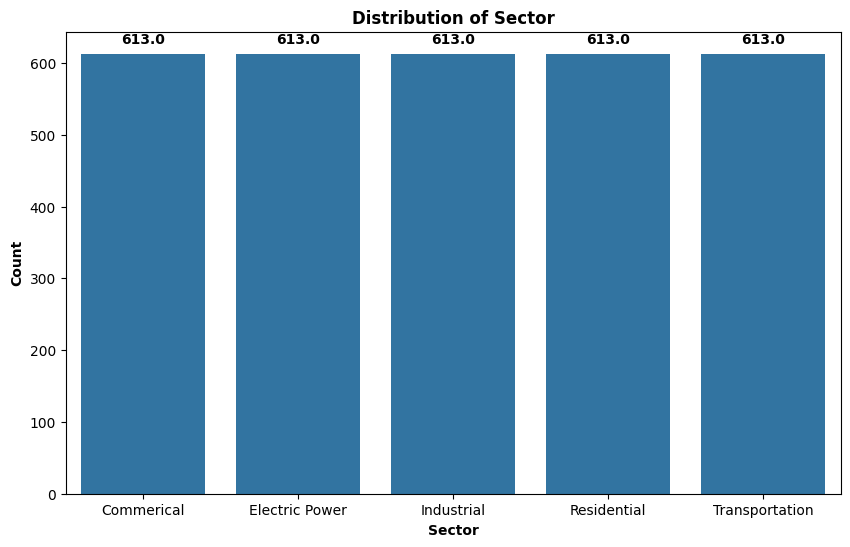

In [107]:
# Inspect value counts by categorical column
US_Renewable_df['Sector'].value_counts()

# Inspect value counts for ALL categorical columns
for col in US_Renewable_df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=col, data=US_Renewable_df)
    plt.title(f'Distribution of {col}', fontweight='bold')
    plt.xlabel(col, fontweight='bold')
    plt.ylabel('Count', fontweight='bold')
    
    # Annotate each bar with the count
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontweight='bold')
    
    plt.show()

#### <span style="color:teal">**Summary of Distribution of Sectors**</span>
##### - Each sector (`Commercial`, `Electric Power`, `Industrial`, `Residential`, and `Transportation`) has 613 features.
##### - The U.S. Renewable Energy Consumption dataset contains an equal number of samples for each sector.
##### - This balance ensures that the dataset is not biased towards any particular sector.

<hr style="border: 1px solid teal;">

#### 6. Initial Data Transformation and Feature Engineering

In [108]:
# Combine the top three energy sources from all sectors into a single list
combined_top_three = set([source for sublist in top_three_energy_sources for source in sublist])

# Find the energy sources that are not in the combined top three list
not_in_top_three_any_sector = [source for source in energy_sources if source not in combined_top_three]

# Display the list of energy sources not in the top three for any sector
print("\nEnergy sources not in the top 3 for any sector:")
print(not_in_top_three_any_sector)


Energy sources not in the top 3 for any sector:
['Hydroelectric Power', 'Renewable Diesel Fuel', 'Other Biofuels']


In [109]:
# Delete the Energy sources that are not in the top three for any sector
US_Renewable_df.drop(columns=not_in_top_three_any_sector, inplace=True)

# Rename all attributes in the Sector column that are "Commerical" to "Commercial"
US_Renewable_df['Sector'] = US_Renewable_df['Sector'].replace('Commerical', 'Commercial')

# Inspect first few rows of the DataFrame with Updates
US_Renewable_df.head()

,Year,Month,Sector,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Conventional Hydroelectric Power,Biodiesel
0,1973,1,Commercial,0.00,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.570,0.000,0.0
1,1973,1,Electric Power,0.49,0.0,0.0,0.054,0.157,0.0,0.0,0.211,89.223,88.522,0.0
2,1973,1,Industrial,0.00,0.0,0.0,98.933,0.000,0.0,0.0,98.933,99.973,0.000,0.0
3,1973,1,Residential,0.00,0.0,0.0,30.074,0.000,0.0,0.0,0.000,30.074,0.000,0.0
4,1973,1,Transportation,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.0


#### <span style="color:teal">**Summary of Data Transformation & Feature Engineering:**</span>

- **Removed Non-Significant Energy Sources**: Deleted energy sources that were not in the top three for any sector to focus on the most impactful sources.
- **Corrected Typographical Error**: Renamed all instances of "Commerical" to "Commercial" in the Sector column for consistency.
- **Data Inspection**: Verified the updates by inspecting the first few rows of the cleaned DataFrame.

<hr style="border: 1px solid teal;">

#### 7. Initial Visualizations

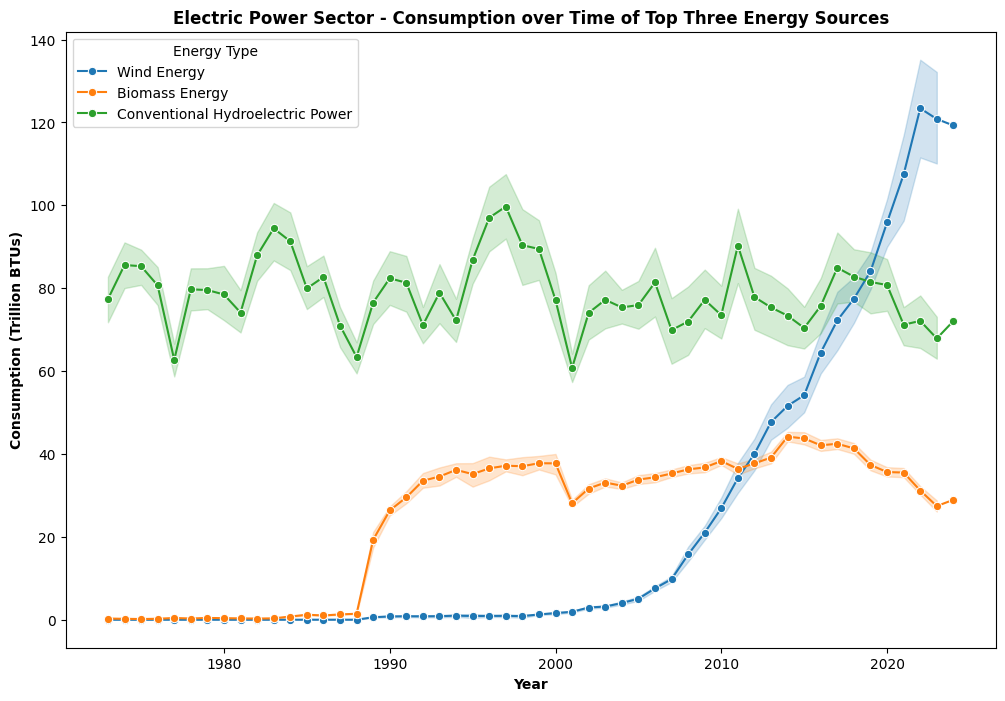

In [110]:
# Filter the DataFrame to include only the Electric Power sector
electric_power_df = US_Renewable_df[US_Renewable_df['Sector'] == 'Electric Power']

# Select the two energy types to plot over time
energy_types = ['Wind Energy', 'Biomass Energy', 'Conventional Hydroelectric Power']

# Melt the DataFrame to have a long format suitable for seaborn
melted_df = electric_power_df.melt(id_vars=['Year'], value_vars=energy_types, var_name='Energy Type', value_name='Consumption')

# Create a line plot with year as the hue
plt.figure(figsize=(12, 8))
sns.lineplot(data=melted_df, x='Year', y='Consumption', hue='Energy Type', marker='o')
plt.title('Electric Power Sector - Consumption over Time of Top Three Energy Sources', fontweight='bold')
plt.xlabel('Year', fontweight='semibold')
plt.ylabel('Consumption (Trillion BTUs)', fontweight='semibold')
plt.legend(title='Energy Type')
plt.show()

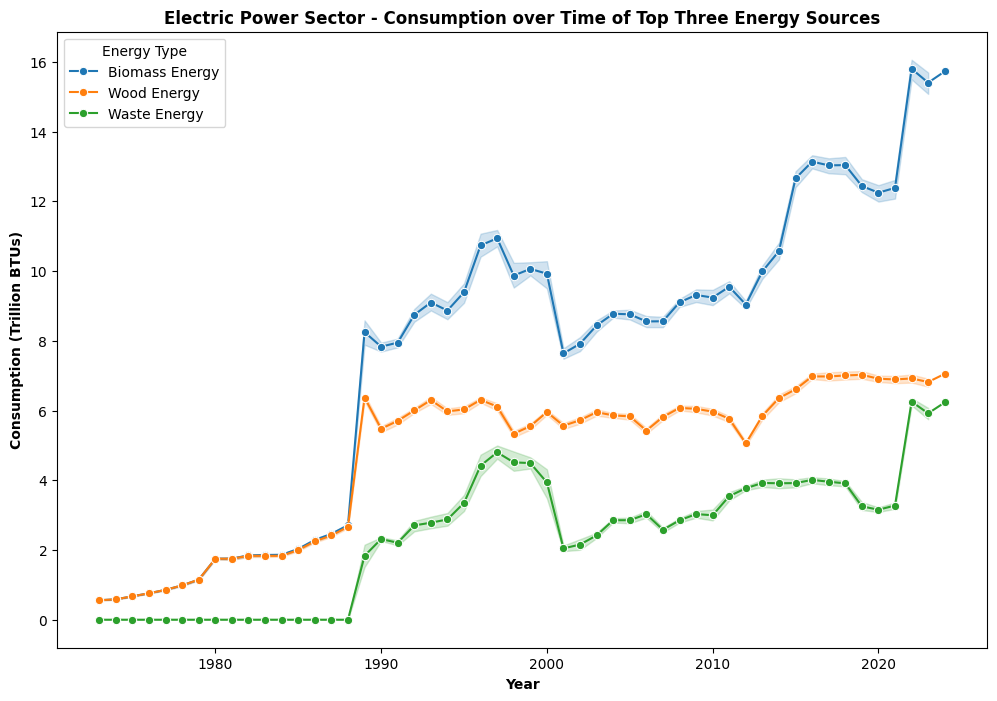

In [111]:
# Filter the DataFrame to include only the Electric Power sector
electric_power_df = US_Renewable_df[US_Renewable_df['Sector'] == 'Commercial']

# Select the two energy types to plot over time
energy_types = ['Biomass Energy', 'Wood Energy', 'Waste Energy']

# Melt the DataFrame to have a long format suitable for seaborn
melted_df = electric_power_df.melt(id_vars=['Year'], value_vars=energy_types, var_name='Energy Type', value_name='Consumption')

# Create a line plot with year as the hue
plt.figure(figsize=(12, 8))
sns.lineplot(data=melted_df, x='Year', y='Consumption', hue='Energy Type', marker='o')
plt.title('Electric Power Sector - Consumption over Time of Top Three Energy Sources', fontweight='bold')
plt.xlabel('Year', fontweight='semibold')
plt.ylabel('Consumption (Trillion BTUs)', fontweight='semibold')
plt.legend(title='Energy Type')
plt.show()

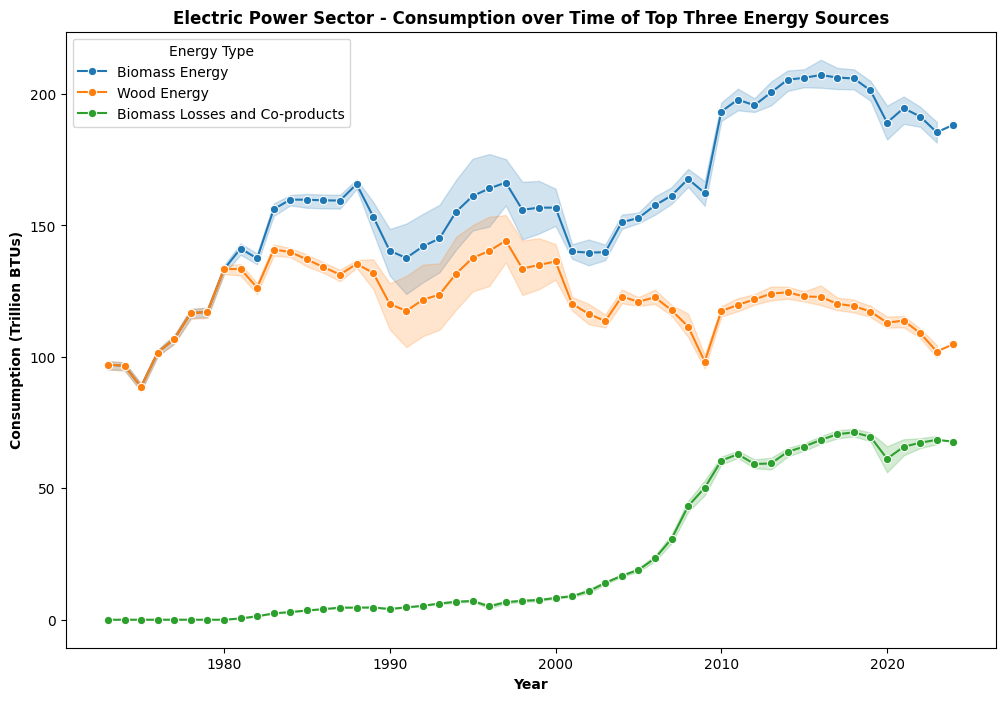

In [113]:
# Filter the DataFrame to include only the Electric Power sector
electric_power_df = US_Renewable_df[US_Renewable_df['Sector'] == 'Industrial']

# Select the two energy types to plot over time
energy_types = ['Biomass Energy','Wood Energy', 'Biomass Losses and Co-products']

# Melt the DataFrame to have a long format suitable for seaborn
melted_df = electric_power_df.melt(id_vars=['Year'], value_vars=energy_types, var_name='Energy Type', value_name='Consumption')

# Create a line plot with year as the hue
plt.figure(figsize=(12, 8))
sns.lineplot(data=melted_df, x='Year', y='Consumption', hue='Energy Type', marker='o')
plt.title('Electric Power Sector - Consumption over Time of Top Three Energy Sources', fontweight='bold')
plt.xlabel('Year', fontweight='semibold')
plt.ylabel('Consumption (Trillion BTUs)', fontweight='semibold')
plt.legend(title='Energy Type')
plt.show()

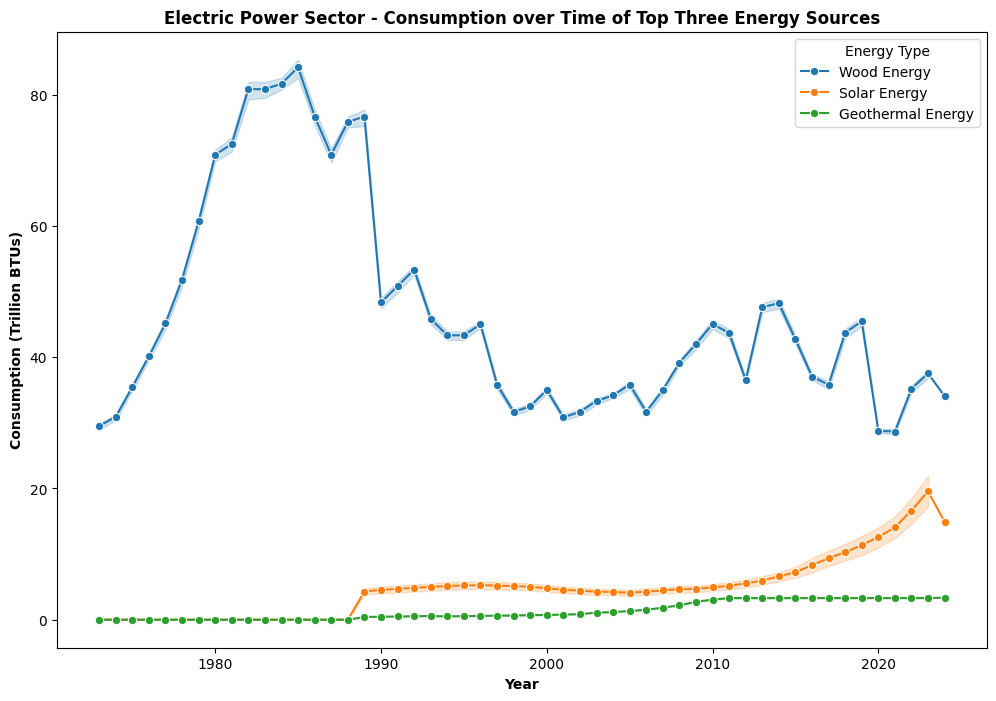

In [114]:
# Filter the DataFrame to include only the Electric Power sector
electric_power_df = US_Renewable_df[US_Renewable_df['Sector'] == 'Residential']

# Select the two energy types to plot over time
energy_types = ['Wood Energy','Solar Energy', 'Geothermal Energy']

# Melt the DataFrame to have a long format suitable for seaborn
melted_df = electric_power_df.melt(id_vars=['Year'], value_vars=energy_types, var_name='Energy Type', value_name='Consumption')

# Create a line plot with year as the hue
plt.figure(figsize=(12, 8))
sns.lineplot(data=melted_df, x='Year', y='Consumption', hue='Energy Type', marker='o')
plt.title('Electric Power Sector - Consumption over Time of Top Three Energy Sources', fontweight='bold')
plt.xlabel('Year', fontweight='semibold')
plt.ylabel('Consumption (Trillion BTUs)', fontweight='semibold')
plt.legend(title='Energy Type')
plt.show()

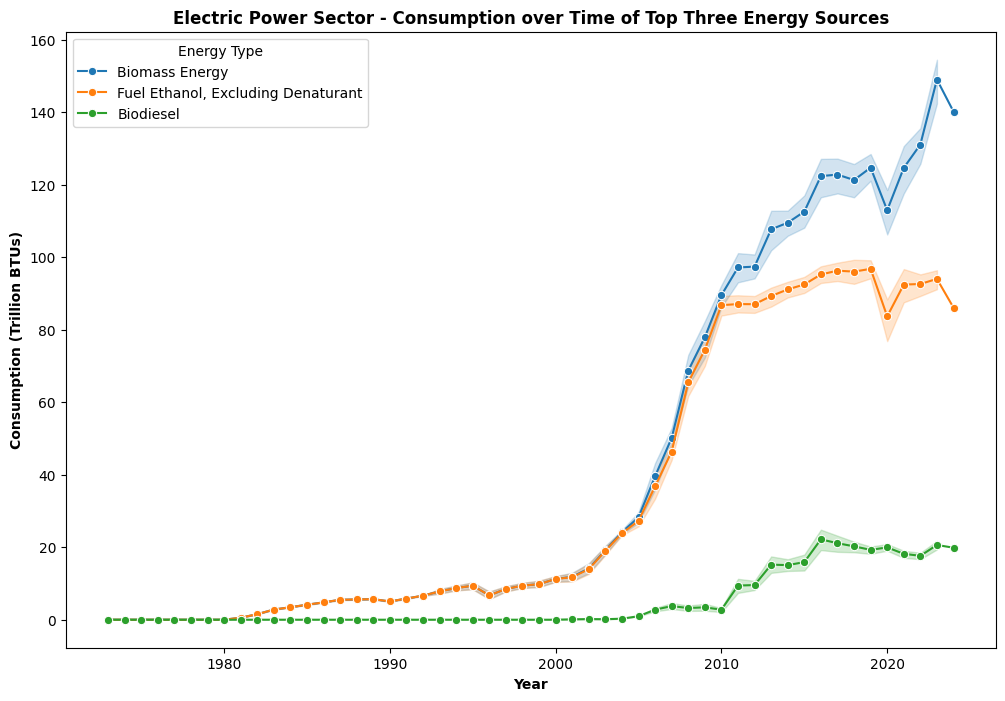

In [115]:
# Filter the DataFrame to include only the Electric Power sector
electric_power_df = US_Renewable_df[US_Renewable_df['Sector'] == 'Transportation']

# Select the two energy types to plot over time
energy_types = ['Biomass Energy','Fuel Ethanol, Excluding Denaturant', 'Biodiesel']

# Melt the DataFrame to have a long format suitable for seaborn
melted_df = electric_power_df.melt(id_vars=['Year'], value_vars=energy_types, var_name='Energy Type', value_name='Consumption')

# Create a line plot with year as the hue
plt.figure(figsize=(12, 8))
sns.lineplot(data=melted_df, x='Year', y='Consumption', hue='Energy Type', marker='o')
plt.title('Electric Power Sector - Consumption over Time of Top Three Energy Sources', fontweight='bold')
plt.xlabel('Year', fontweight='semibold')
plt.ylabel('Consumption (Trillion BTUs)', fontweight='semibold')
plt.legend(title='Energy Type')
plt.show()